# Lesson 1a: Perceptron Learning

In this lesson you will implement one of the first algorithms from the history of neural networks: the perceptron.

You will NOT be using Keras/Tensorflow or other machine learning toolkits for this problem. Instead, you will implement the perceptron learning rule yourself.

Read over the code below. Much has already been done. Areas where you need to add your own code are marked with "TODO" comments.

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [36]:
# Import the 'iris' dataset.
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use the first two features.
y = iris.target
x_min = min(X[:, 0])
x_max = max(X[:, 0])

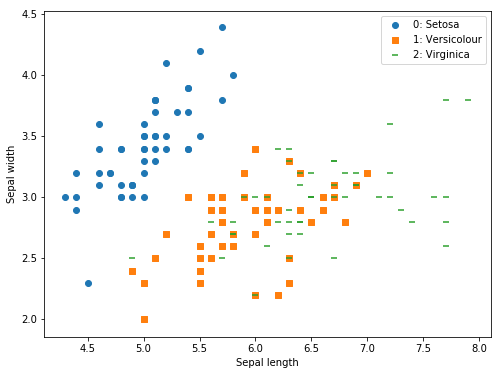

In [37]:
# Plot the data points.
def make_plot():
    plt.figure(figsize=(8, 6))
    markers = ['o', 's', '_']
    colors = 'tab:blue', 'tab:orange', 'tab:green'
    for i, cat in enumerate(np.unique(y)):
        plt.scatter(X[:, 0][y==cat], X[:, 1][y==cat], c=colors[i], marker=markers[i])
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.legend(['0: Setosa', '1: Versicolour', '2: Virginica'])
make_plot()

## Build a perceptron to distinguish Setosa from the other two varieties

Versicolour and Virginica are intermixed in this plot; note that some datapoints have identical (length, width) values but differente categories! Thus, we will focus on distinguishing Setosa from the other two, because perceptrons require data to be linearlly separable.

The perceptron will have a simple structure:
    
    * Two input nodes: one for Sepal length, one for Sepal width.
    * One output node: the output will be 0 for Setosa (category 0), and 1 for either of the other two categories.

In [38]:
class Perceptron():
    """Simple perceptron with 2 inputs and 1 output."""
    
    def __init__(self):
        # Initialize the perceptron weights and the bias term.
        self._w = [0, 0]
        self._b = 0
        # Add properties for tracking the accuracy during training
        self._accuracy_tracker = []
        self._acc = 0
    
    def predict(self, x, verbose=False):
        """x is the input weight vector. Output is the result of running the perceptron on this input.
        
        Implement the Perceptron rule that involves multiplying weights by input, adding in bias, using a threshold, etc.
        
        The returned output should be 1 or 0.
        
        Use the "verbose" flag to print debugging info if desired.
        """
        # Compute z as dot product of weights and x plus the bias term
        z = np.dot(self._w,x) + self._b
        # Assuming a threshold of zero, return 1 if z > 0, 0 otherwise
        y = 1 if z > 0 else 0
        
        if verbose:
            # Print computation results here if desired.
            print('--> Inside predict. Current weights: %s' % self._w)
            print('--> Inside predict. Current bias: %s' % self._b)
            print('--> Inside predict. X values: %s' % x)
            print('--> Inside predict. z value: %f' % z)
            print('--> Inside predict. y value: %f' % y)
            pass
        
        return y
        
    def accuracy(self, x, y):
        """Compute the total % accuracy over a set of inputs x and corresponding outputs y."""
        correct = 0
        for i in range(len(x)):
            example_x = x[i]
            example_y = y[i]
            if self.predict(example_x) == example_y:
                correct += 1
        return float(correct) / len(x)
            
    def update_weights(self, x, target, verbose=False):
        """Update the perceptron's weights according to the perceptron learning rule.
        
        x is an input example, and target is the desired output.
        
        This function should modify self._b and self._w. It has no return value.
        
        Use the "verbose" flag to print debugging info if desired.
        """
        current_output = self.predict(x, verbose)

        if verbose:
            print('--> Inside update weights. Target = %f' % target)
            print('--> Inside update weights. Current output = %f' % current_output)
        
        # Update weights and bias
        self._w += (target - current_output) * x
        # For bias term, assume x = 1
        self._b += (target - current_output)
        
    def train(self, x, y, num_iterations, verbose=False):
        """Train the perceptron for the given number of iterations on the input data x with 
        corresponding target values y.
        
        Use the "verbose" flag to print debugging info if desired.
        """
        assert(len(x) == len(y))
        for i in range(num_iterations):
            for j in range(len(x)):
                example_x = x[j]
                example_y = y[j]

                # Train the perceptron on this input/output example pair (example_x, example_y).
                # This should update the perceptron's weights.
                self.update_weights(example_x, example_y, verbose)
                
                if verbose:
                    print('--> Inside train. Weights:', self._w)
                    print('--> Inside train. Bias:', self._b)                      
                    pass
                    
            # Print some useful info during training.
            acc = self.accuracy(x, y)
            self._acc = acc*100
            self._accuracy_tracker.append(acc*100)
            # Stop early if 100% accuracy achieved
            if abs(acc-1) < 1e-6:
                print('100% accuracy achieved. Exiting...')
                return
            

## Set up dataset for training a Setosa/not-Setosa classifier

In [39]:
def get_shuffled_data(x, y):
    """Convenient function to shuffle data and outputs, to inject some randomness into training."""
    # Create shuffle pattern of indices.
    s = np.arange(x.shape[0])
    np.random.shuffle(s)
    
    # Apply suffle pattern to x and y.
    x_shuffled = x[s]
    y_shuffled = y[s]
    return x_shuffled, y_shuffled

In [40]:
# Map data labels to just two categories.
y_two_categories = np.array([0 if i==0 else 1 for i in y])

In [41]:
X_shuffled, y_shuffled = get_shuffled_data(X, y_two_categories)

## Train a perceptron on the shuffled data
Try to get as high an accuracy as possible.

In [42]:
p = Perceptron()
# Train the model
p.train(X_shuffled,y_shuffled,10000,verbose=False)

100% accuracy achieved. Exiting...


The section below plots the accuracy as a function of the iteration number. Note that the algorithm was modified to stop if the accuracy achieves 100% before the given number of iterations.

Accuracy using current parameters: 100.00%


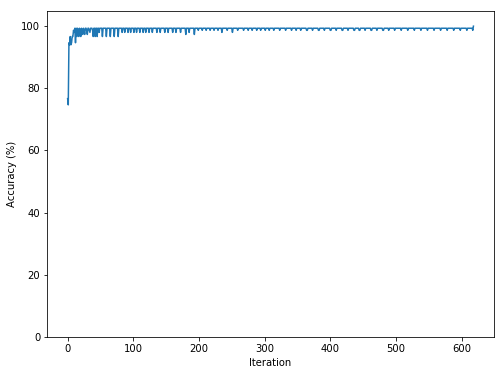

In [43]:
print('Accuracy using current parameters: %4.2f%%' % p._acc)
plt.figure(figsize=(8,6))
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.ylim(0,105)
plt.plot(p._accuracy_tracker)

## Plot the learned perceptron decision boundary

Our perceptron makes decisions based on the value of b + w1x1 + w2x2. We can set this to 0 and solve to find the decision boundary. 

Complete the function below to compute x2 (the y axis in the plot above) as a function of b, w1, x1, w2 for a given perceptron:  
x2 = (-b - w1x1) / w2

In [44]:
def get_y_decision_boundary(x1, perceptron):
    x2 = (-perceptron._b - perceptron._w[0]*x1)/perceptron._w[1]
    return x2

### Compute the decision boundary for the perceptron trained above, and plot it.

In [45]:
y1 = get_y_decision_boundary(x_min, p)
y2 = get_y_decision_boundary(x_max, p)
y1, y2

(2.1121379310345243, 5.0467586206897677)

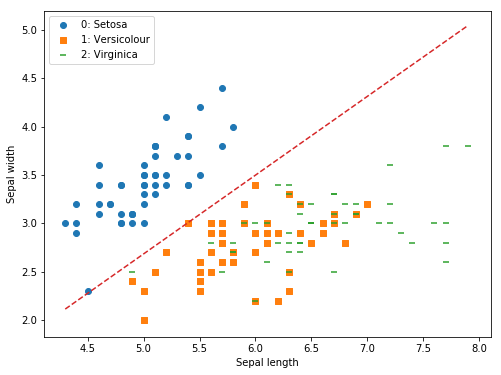

In [46]:
make_plot()
plt.plot([x_min,x_max], [y1,y2], ls='dashed', c='tab:red')

## Another model: Virginica/not-Virginica classifier

Build a new model, but grouping categories 0 and 1 together, trying to separate out Virginica from the other two classes.

In [47]:
y_two_categories_2 = np.array([0 if i==2 else 1 for i in y])

In [48]:
X_shuffled, y_shuffled = get_shuffled_data(X, y_two_categories_2)
p2 = Perceptron()
# Train the perceptron
p2.train(X_shuffled,y_shuffled,10000,verbose=False)

Accuracy using current parameters: 64.00%


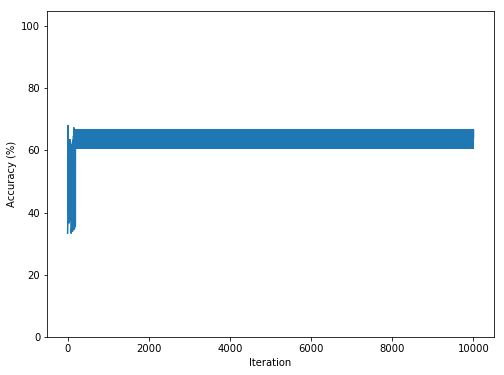

In [49]:
print('Accuracy using current parameters: %4.2f%%' % p2._acc)
plt.figure(figsize=(8,6))
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.ylim(0,105)
plt.plot(p2._accuracy_tracker)

Note that 100% accuracy was never achieved for this classifier, the upper limit appears to be just over 80%.

# Calculate the decision boundary and plot it.

In [50]:
y1 = get_y_decision_boundary(x_min, p2)
y2 = get_y_decision_boundary(x_max, p2)

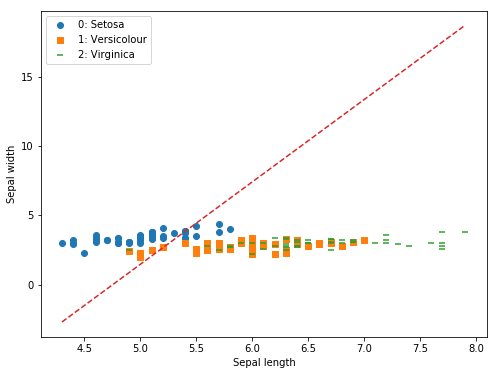

In [51]:
make_plot()
plt.plot([x_min,x_max], [y1,y2], ls='dashed', c='tab:red')

# Discuss the results in the cell below. How did the two perceptrons compare? 

The first perceptron was able to completely separate the Setosa from the Not-Setosa class. The maximum achievable accuracy of the classifier was 100%, and this is due to the fact that the classes are linearly separable, and there is no overlap between classes.

The second perceptron was not able to completely separate the Virginica from the Not-Virginica class. The maximum achievable accuracy was approximately 83%, and this is due to the fact that the classes are not linearly separable, and there is significant overalap between the classes. In fact, some observations contained the same features but were assigned to both classes. A possible solution to this problem would be to try a different combination of features that better separate the classes, or to add hidden layers to enable a non-linear boundary.

# Conceptual Overview

The network structure of the perceptron is a very simple. It consists of a finite number of input nodes that connect to a single central node, which connects to an output node. There are weights associated with each input node, and a single bias term. Its purpose is to model any function or decision boundary that is linearly separable, such as the logical AND or OR functions, or a binary classifier that is separable with a linear boundary, such as the iris example above. 

Assuming the input consists of a matrix (X) and a vector of expected results (y), the perceptron works as follows: For each row, compute the dot product of the row with the weights, and add the bias term. If this is greater than zero, the central node outputs 1, 0 otherwise. This output is compared with the expected value in y, and the weights are updated by adding the corresponding value of x multiplied by the delta between the current and expected values. This process repeats until convergence is achieved (assuming a linearly separable function or decision boundary), or until the desired number of iterations has passed.

As seen in the first part of the assignment, for a linearly separable dataset the model can achieve 100% accuracy given enough iterations. However, as seen in the second part, if the dataset is not linearly separable, performance will be suboptimal, and there is no way to achieve 100% accuracy. In this case, a nonlinear method would be required to achieve higher accuracy.